In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import os
from config import *
os.chdir("E:/code/comsol")

# 读取CSV文件
data = pd.read_csv('exports/slit-9-1/params_del_bad.csv')
params_name = ['R', 'r', 'slit', 't', 'w']
params = data[params_name].values
responses = data[[f'bd_{i}' for i in range(10)]].values
# 对参数进行归一化
scaler_params = MinMaxScaler()
params_normalized = scaler_params.fit_transform(params)

# 对响应数据进行归一化（如果需要）
scaler_responses = MinMaxScaler()
responses_normalized = scaler_responses.fit_transform(responses)

# 计算灵敏度
def calculate_sensitivity(params, responses):
    num_params = params.shape[1]
    sensitivities = []
    
    for i in range(num_params):
        # 使用线性回归计算灵敏度
        slope, _, _, _, _ = stats.linregress(params[:, i], responses.mean(axis=1))
        sensitivities.append(slope)
    
    return sensitivities

sensitivities = calculate_sensitivity(params_normalized, responses_normalized)
sens_dict = {name: sensitivity for name, sensitivity in zip(params_name, sensitivities)}
print('Sensitivity:', sens_dict)

Sensitivity: {'R': -0.3306236269501218, 'r': 0.2002069262405896, 'slit': 0.11303118098179027, 't': -0.11734577038270004, 'w': 0.18505249272933627}


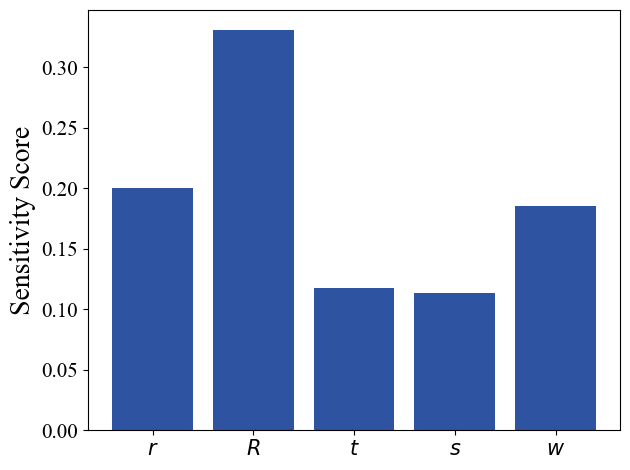

In [2]:
from matplotlib import pyplot as plt
plt.rcParams["legend.fontsize"] = 'large'
plt.rcParams["font.family"] = 'Times New Roman'
names = ["r", "R", "t", "slit", "w"]
latexs = [fr"${n[:1]}$" for n in names]
sens = [abs(sens_dict[n]) for n in names]
plt.bar(latexs, sens, color=colors["blue"])
plt.tick_params(axis='both', labelsize=ticksize)
plt.ylabel("Sensitivity Score", fontsize=fontsize)
plt.tight_layout()
plt.savefig(r"notebooks\plots\figures\fig3c_sensitivity.pdf")
plt.show()